In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [28]:
Test1, Test2 = np.empty([8, 4096]), np.empty([8, 4096])
for i in range(1, 9):
    t1 = "RPi_data/Test_1_p1_g" + str(i) + "_2019-05-28_D3S.csv"
    t2 = "RPi_data/Test_2_p1_g" + str(i) + "_2019-05-28_D3S.csv"
    Test1[i-1] = np.sum(np.genfromtxt(t1, delimiter= ",").T, axis=1)
    Test2[i-1] = np.sum(np.genfromtxt(t2, delimiter= ",").T, axis=1)

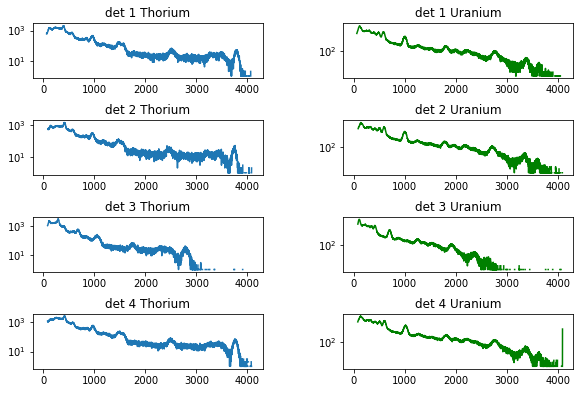

In [67]:
for i in range(1, 9):
    subplot = int(str(42)+str(i))
    #print(subplot)
    plt.subplot(subplot)
    if i % 2 == 1:
        det = i//2 + 1
        plt.plot(Test1[det-1])
        plt.yscale('log')
        plt.title("det " + str(det) + " Thorium")

    else:
        det = i//2
        plt.plot(Test2[det-1], 'g')
        plt.yscale('log')
        plt.title("det " + str(det) + " Uranium")

plt.subplots_adjust(top=1, bottom=-0.2, left=0, right=1.25, hspace=0.75, wspace=0.35)
plt.show()

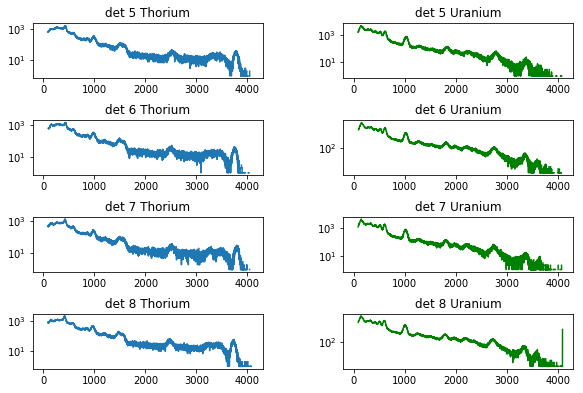

In [66]:
for i in range(1, 9):
    subplot = int(str(42)+str(i))
    #print(subplot)
    plt.subplot(subplot)
    if i % 2 == 1:
        det = i//2 + 1 + 4
        plt.plot(Test1[det-1])
        plt.yscale('log')
        plt.title("det " + str(det) + " Thorium")

    else:
        det = i//2 + 4
        plt.plot(Test2[det-1], 'g')
        plt.yscale('log')
        plt.title("det " + str(det) + " Uranium")

plt.subplots_adjust(top=1, bottom=-0.2, left=0, right=1.25, hspace=0.75, wspace=0.35)
plt.show()

In [162]:
%%writefile tryPeakfinder.py
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
testnum = int(input("Enter test number (1, 2): "))
detnum = int(input("Enter det number (1, 8): "))
gentext = "RPi_data/Test_" + str(testnum) + "_p1_g" + str(detnum) + "_2019-05-28_D3S.csv"

csv = np.genfromtxt(gentext, delimiter= ",").T
summed = np.sum(csv, axis=1)

'''
This is a helper fuction that looks at each index and checks if it is a peak.
REMOVED:::::Does not look at values under 1/4 of np.average(data):::::::
'''
def checkShape(i, data, r, e):
    sweep = [data[i + dx] for dx in range(-r, r+1)]
    prev=sweep[r]
    if not prev == max(sweep):# or prev < np.average(data)/4:
        return False
#     if not prev > np.average(sweep) * 1.5:
#         return False
    e = e * 2
    # ^because the code checks r indices to the left and right
    for k in range(1, r+1):
        if e < 0:
            #print(e)
            return False
        if sweep[r-k] > prev:
            e = e - 1
        prev = sweep[r-k]
    prev=sweep[r]
    for k in range(1, r+1):
        if e < 0:
            return False
        if sweep[r+k] > prev:
            e = e - 1
        prev = sweep[r+k]
    return e >= 0

'''
Takes in a summed peak count, a peak range, and an error allowance and returns possible peaks.
Peak range is the number of values the function will look at on either side
Error allowance is the number of values within the peak range that are allowed to not fit a downwards slope
'''
def sweepLeft(data, r, e):
    peaks = []
    index = r
    while index < len(data) - r:
        if checkShape(index, data, r, e):
            peaks.append(index)
            index = index + r - e//2
        else:
            index += 1
    return peaks
peakRange = int(input("Enter a peak range: "))
errAllo = int(input("Enter an error allowance: "))


ldots = sweepLeft(summed, peakRange, errAllo)
print("returned peaks:", ldots)
print("len peaklist:", len(ldots))
#print(len(ldots))
#print(np.average(summed)/4)
x=np.arange(len(summed))
plt.plot(summed)
#plt.plot(x, np.average(summed)/4 + 0*x)
plt.plot(ldots, summed[ldots], 'ro')
plt.yscale('log')
plt.show()

Overwriting tryPeakfinder.py


In [ ]:
%run tryPeakfinder.py